In [67]:
from astroquery.mast import Mast
from astroquery.mast import Observations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import fits
import wget

In [68]:
#Get Keplar IDs of confirmed non-planets and confirmed planets. Tables from NASA exoplanet archive.
nplanets = pd.read_csv('non_planets.csv', skiprows=17) 
planets = pd.read_csv('planets_keplar.csv')

Note not all the objects have light curve data

In [69]:
def download_keplar_file(target_name, cadence=0):
    keplerObs = Observations.query_criteria(target_name=target_name, obs_collection='Kepler')
    
    if cadence == 0:
        cadstr = 'LLC'
    elif cadence ==1:
        cadstr = 'SLC'
    else:
        raise Exception('cadence must be 0 or 1')
    
    if(len(keplerObs)>0):
        keplerProds = Observations.get_product_list(keplerObs[cadence]) #0 for long cadence data, 1 for short cadence data
        Prod = Observations.filter_products(keplerProds, productSubGroupDescription=cadstr)

        # Download first data product
        url = 'https://mast.stsci.edu/api/v0.1/Download/file?uri='+Prod['dataURI'][0] 
        filename = wget.download(url)
        return(filename)
    else:
        raise Exception('No data for this object')

In [205]:
i=66
target_name = 'kplr'+'0'*(9-len(str(planets['kepid'][i])))+str(planets['kepid'][i])
filename = download_keplar_file(target_name, cadence=0)#0 for long cadence data, 1 for short cadence data

In [206]:
with fits.open(filename, mode="readonly") as hdulist:
    # Read in the "BJDREF" which is the time offset of the time array.
    bjdrefi = hdulist[1].header['BJDREFI'] 
    bjdreff = hdulist[1].header['BJDREFF']

    # Read in the columns of data.
    times = hdulist[1].data['time'] 
    sap_fluxes = hdulist[1].data['SAP_FLUX'] #Simple Aperture Photometry flux
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX'] #Pre-search Data Conditioning Simple Aperture Photometry is processed flux

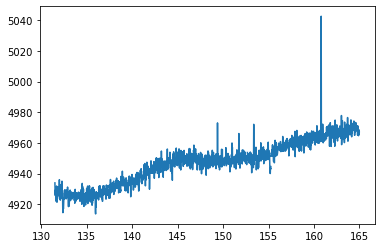

In [207]:
plt.plot(times, sap_fluxes);

In [177]:
target_name

'kplr006949607'

# Non planets

In [315]:
i = 9
target_name = 'kplr'+'0'*(9-len(str(nplanets['kepid'][i])))+str(nplanets['kepid'][i])
filename = download_keplar_file(target_name, cadence=0) #only long cadence data for non planets

In [316]:
with fits.open(filename, mode="readonly") as hdulist:
    # Read in the "BJDREF" which is the time offset of the time array.
    bjdrefi = hdulist[1].header['BJDREFI'] 
    bjdreff = hdulist[1].header['BJDREFF']

    # Read in the columns of data.
    times = hdulist[1].data['time'] 
    sap_fluxes = hdulist[1].data['SAP_FLUX'] #Simple Aperture Photometry flux
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX'] #Pre-search Data Conditioning Simple Aperture Photometry is processed flux

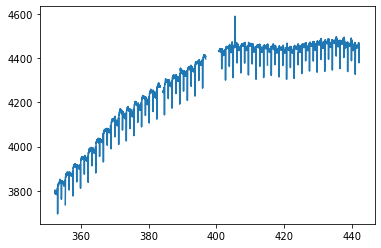

In [317]:
plt.plot(times, sap_fluxes);